Data 620 Web Analytics

Summer 2023 - Project 3

Khyati Naik

Laura Puebla

video Link : https://youtu.be/jOszUsz3kRw

Using any of the three classifiers described in chapter 6 of Natural Language Processing with Python, and any features you can think of, build the best name gender classifier you can. Begin by splitting the Names Corpus into three subsets: 500 words for the test set, 500 words for the dev-test set, and the remaining 6900 words for the training set. Then, starting with the example name gender classifier, make incremental improvements. Use the dev-test set to check your progress. Once you are satisfied with your classifier, check its final performance on the test set. How does the performance on the test set compare to the performance on the dev-test set? Is this what you'd expect?

In [6]:
import random
import nltk
from nltk.corpus import names
from nltk import NaiveBayesClassifier
from nltk.classify import accuracy
import pandas as pd
import matplotlib.pyplot as plt

# Set the seed for reproducibility
random.seed(30)

# Download the necessary corpus
nltk.download('names')

# Load the Names Corpus
male_names = names.words('male.txt')
female_names = names.words('female.txt')

[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Package names is already up-to-date!


Number of male names: 2943
Number of female names: 5001
Total names: 7944
Unique names: 7579


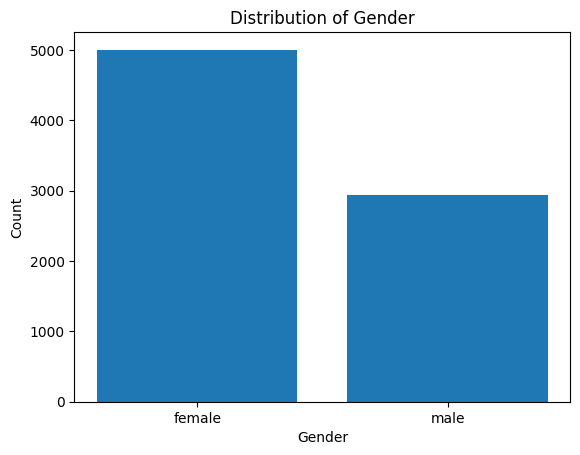

In [7]:
# Create a DataFrame for analysis
data = pd.DataFrame({'name': male_names + female_names,
                     'gender': ['male'] * len(male_names) + ['female'] * len(female_names)})

# Data exploration
print("Number of male names:", len(male_names))
print("Number of female names:", len(female_names))
print("Total names:", len(data))
print("Unique names:", len(data['name'].unique()))

# Plotting the distribution of gender
gender_counts = data['gender'].value_counts()
plt.bar(gender_counts.index, gender_counts.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')
plt.show()

In [8]:
# Split the Names Corpus into training, dev-test, and test sets
names = [(name, 'male') for name in names.words('male.txt')] + [(name, 'female') for name in names.words('female.txt')]
random.shuffle(names)
test_set = names[:500]
devtest_set = names[500:1000]
train_set = names[1000:]

In [9]:
# Define feature extractor function with additional features
def name_features(name):
    features = {}
    features['last_letter'] = name[-1].lower()
    features['first_letter'] = name[0].lower()
    features['length'] = len(name)
    return features

In [10]:
# Extract features from the training set
train_features = [(name_features(name), gender) for (name, gender) in train_set]

# Train the Naive Bayes classifier
classifier = NaiveBayesClassifier.train(train_features)

# Print the features used in the original Naive Bayes classifier
print("Original Naive Bayes classifier features:")
print(classifier.show_most_informative_features(5))

Original Naive Bayes classifier features:
Most Informative Features
             last_letter = 'a'            female : male   =     34.8 : 1.0
             last_letter = 'k'              male : female =     28.1 : 1.0
             last_letter = 'f'              male : female =     13.8 : 1.0
             last_letter = 'p'              male : female =     12.4 : 1.0
             last_letter = 'v'              male : female =     10.4 : 1.0
None


In [11]:
# Evaluate accuracy on the dev-test set
devtest_features = [(name_features(name), gender) for (name, gender) in devtest_set]
devtest_labels = [gender for (name, gender) in devtest_set]
devtest_accuracy = accuracy(classifier, devtest_features)
print("Original Naive Bayes classifier accuracy:", devtest_accuracy)

# Evaluate accuracy on the test set
test_features = [(name_features(name), gender) for (name, gender) in test_set]
test_labels = [gender for (name, gender) in test_set]

nb_test_accuracy = accuracy(classifier, test_features)
print("Original Naive Bayes classifier test accuracy:", nb_test_accuracy)

Original Naive Bayes classifier accuracy: 0.764
Original Naive Bayes classifier test accuracy: 0.812


In [12]:
# Enhancements: Add more features to the feature extractor function
def enhanced_name_features(name):
    features = {}
    features['last_letter'] = name[-1].lower()
    features['first_letter'] = name[0].lower()
    features['length'] = len(name)
    features['last_two_letters'] = name[-2:].lower()
    features['first_two_letters'] = name[:2].lower()
    features['has_vowel'] = any(letter in 'aeiou' for letter in name.lower())
    features['num_vowels'] = sum(letter in 'aeiou' for letter in name.lower())
    features['double_letters'] = any(name[i] == name[i+1] for i in range(len(name)-1))
    return features

In [13]:
# Extract enhanced features from the training set
enhanced_train_features = [(enhanced_name_features(name), gender) for (name, gender) in train_set]

# Train the Naive Bayes classifier with enhanced features
enhanced_classifier = NaiveBayesClassifier.train(enhanced_train_features)

In [14]:
# Print the features used in the enhanced Naive Bayes classifier
print("Enhanced Naive Bayes classifier features:")
print(enhanced_classifier.show_most_informative_features(5))

Enhanced Naive Bayes classifier features:
Most Informative Features
        last_two_letters = 'na'           female : male   =     96.6 : 1.0
        last_two_letters = 'la'           female : male   =     69.7 : 1.0
        last_two_letters = 'rd'             male : female =     41.2 : 1.0
        last_two_letters = 'ia'           female : male   =     37.8 : 1.0
        last_two_letters = 'us'             male : female =     35.3 : 1.0
None


In [15]:
# Evaluate accuracy on the dev-test set with enhanced features
enhanced_devtest_features = [(enhanced_name_features(name), gender) for (name, gender) in devtest_set]
enhanced_devtest_accuracy = accuracy(enhanced_classifier, enhanced_devtest_features)
print("Enhanced Naive Bayes classifier accuracy:", enhanced_devtest_accuracy)


enhanced_test_features = [(enhanced_name_features(name), gender) for (name, gender) in test_set]
enhanced_test_accuracy = accuracy(enhanced_classifier, enhanced_test_features)
print("Enhanced Naive Bayes classifier test accuracy:", enhanced_test_accuracy)

Enhanced Naive Bayes classifier accuracy: 0.8
Enhanced Naive Bayes classifier test accuracy: 0.826
